<a href="https://colab.research.google.com/github/LCaravaggio/ClaseTimeSeries/blob/main/Ejercicio5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
import json

import requests
from requests.auth import HTTPBasicAuth

import pandas as pd

In [2]:
drive.mount('/content/drive', force_remount=True)
with open("/content/drive/My Drive/alphacast.json", 'r') as f:
    api_token= json.load(f)

Mounted at /content/drive


In [3]:
# Definir user key para la API
user_key = api_token["key"]

También es posible tomar dos series de un mismo dataset: 

In [55]:
# Merval y GGAL
ds='5816' # Equity Argentina
select1='71475' # ALUA
select2='71483' # EDD
select3='71484' # GGAL
equity = requests.get('https://api.alphacast.io/datasets/'+ds+'/data?apiKey='+user_key+'&%24select='+ select1 +'%2C'+ select2 + '%2C'+ select3 + '&$format=csv', auth=HTTPBasicAuth(user_key, ''))
open('equity.csv','wb').write(equity.content)
equity = pd.read_csv('equity.csv',delimiter = ',')

In [56]:
equity=equity.dropna()

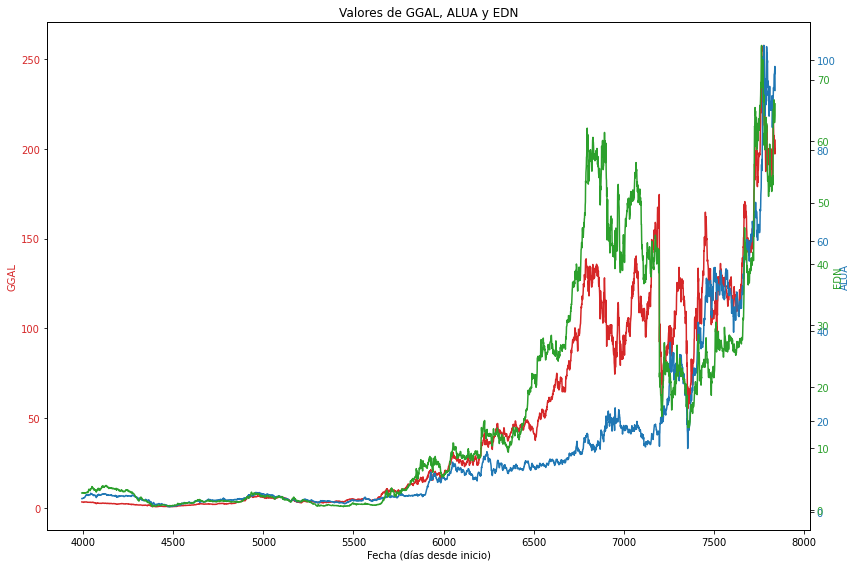

In [57]:
import matplotlib as mpl
%matplotlib inline
from matplotlib import pyplot as plt


mpl.rcParams['figure.figsize'] = (12,8)

time = equity.index

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Fecha (días desde inicio)')
ax1.set_ylabel('GGAL', color = color)
ax1.plot(time, equity.GGAL, color = color)
ax1.tick_params(axis = 'y', labelcolor = color)

ax2 = ax1.twinx()  
ax3 = ax1.twinx()  

color = 'tab:blue'
ax2.set_ylabel('ALUA', color = color) 
ax2.plot(time, equity.ALUA, color = color)
ax2.tick_params(axis = 'y', labelcolor = color)

color = 'tab:green'
ax3.set_ylabel('EDN', color = color) 
ax3.plot(time, equity.EDN, color = color)
ax3.tick_params(axis = 'y', labelcolor = color)

plt.title('Valores de GGAL, ALUA y EDN')

fig.tight_layout()  
plt.show()

In [58]:
equity=equity.drop(['Date', 'country'], axis=1)
equity=equity.dropna()

In [63]:
from statsmodels.tsa.vector_ar.vecm import VECM, select_order, select_coint_rank

lag_order = select_order(data=equity, maxlags=10, deterministic="ci", seasons=4)

rank_test = select_coint_rank(equity, 0, 3, method="trace", signif=0.05)

model = VECM(equity, deterministic="ci", seasons=4,  coint_rank=rank_test.rank)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was pro

In [64]:
vecm_res = model.fit()

In [65]:
vecm_res.summary()

,coef,std err,z,P>|z|,[0.025,0.975]
season1,0.0312,0.030,1.048,0.295,-0.027,0.090
season2,-0.0017,0.030,-0.058,0.954,-0.060,0.057
season3,0.0282,0.030,0.949,0.343,-0.030,0.087
L1.ALUA,0.1126,0.018,6.102,0.000,0.076,0.149
L1.EDN,0.0151,0.017,0.901,0.367,-0.018,0.048
L1.GGAL,-0.0166,0.005,-3.167,0.002,-0.027,-0.006
,coef,std err,z,P>|z|,[0.025,0.975]
season1,0.0281,0.038,0.732,0.464,-0.047,0.103
season2,0.0246,0.038,0.642,0.521,-0.051,0.100
season3,0.0176,0.038,0.460,0.645,-0.058,0.093
